# t-sne

In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [3]:
X.shape

(500, 64)

In [4]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


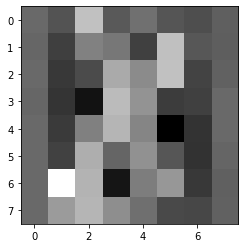

8


In [67]:
X=pd.DataFrame(X)
plt.figure()
idx=40
grid_data= X.iloc[idx].values.reshape(8,8)
plt.imshow(grid_data,interpolation="none", cmap="gray")
plt.show()
print(y[idx])

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [6]:
X_2d = tsne.fit_transform(X)

In [7]:
mydata=pd.DataFrame(X_2d,columns=['X','Y'])

In [8]:
mydata['digits']=y

In [9]:
mydata

,X,Y,digits
0,21.128862,-27.168310,0
1,4.987787,19.583260,1
2,-2.877124,15.290366,2
3,-8.521600,-21.091736,3
4,15.439630,23.603703,4
...,...,...,...
495,-11.408027,-5.706061,5
496,12.562231,22.834518,4
497,12.427700,21.450829,4
498,-16.493898,10.183492,7


In [10]:
import seaborn as sns
%matplotlib inline

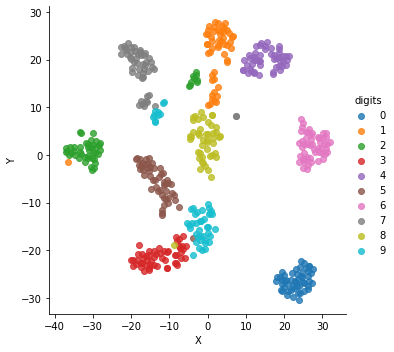

In [11]:
sns.lmplot('X','Y',hue='digits',data=mydata,fit_reg=False)

# PCA

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.preprocessing import scale

In [7]:
X=pd.DataFrame(X)

In [8]:
import seaborn as sns
%matplotlib inline

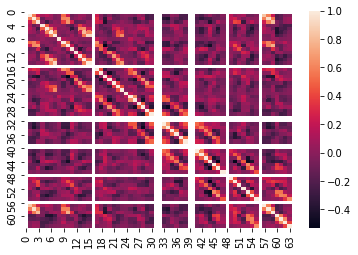

In [10]:
sns.heatmap(X.corr())

In [11]:
X.shape

(500, 64)

In [12]:
X = scale(X)

In [26]:
pca = PCA(n_components=30)

In [27]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_

array([[-3.64252984e-19,  1.66487613e-01,  2.82723339e-01, ...,
         8.43317518e-02,  1.31338843e-01,  6.50920091e-02],
       [-1.11087813e-18,  1.52827946e-01,  1.64825852e-01, ...,
        -1.85739705e-01, -1.20871411e-01, -2.53273245e-02],
       [ 7.63875092e-18, -7.55024258e-03,  1.39450682e-02, ...,
        -1.74511068e-01, -1.03964179e-01, -4.87060114e-02],
       ...,
       [-1.21952664e-17, -1.96823061e-01,  2.43477309e-01, ...,
         4.75681841e-02,  4.34042970e-01, -2.16335239e-01],
       [-5.01483735e-18,  1.37572205e-01, -1.34233614e-01, ...,
        -1.24514131e-01,  1.78908896e-01, -5.65307898e-02],
       [ 9.38291995e-18, -1.42283916e-01, -3.99198023e-03, ...,
        -1.29714954e-01,  6.05768786e-02, -1.54454522e-01]])

In [29]:
pca.components_.shape

(30, 64)

In [30]:
var= pca.explained_variance_ratio_

print(var)

[0.12663392 0.11708302 0.09571633 0.08150309 0.05908238 0.04850778
 0.03837072 0.03467566 0.03323844 0.03118078 0.02605507 0.0228442
 0.01979542 0.01873576 0.01842789 0.01798289 0.01705212 0.01536987
 0.01452443 0.01348523 0.0121402  0.01057205 0.00941575 0.00853207
 0.00814234 0.00746037 0.00692708 0.00667642 0.00579687 0.00554259]


In [31]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[12.66 24.37 33.94 42.09 48.   52.85 56.69 60.16 63.48 66.6  69.21 71.49
 73.47 75.34 77.18 78.98 80.69 82.23 83.68 85.03 86.24 87.3  88.24 89.09
 89.9  90.65 91.34 92.01 92.59 93.14]


In [32]:
pca = PCA(n_components=11)

In [33]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.components_.shape

(11, 64)

In [35]:
X1=pd.DataFrame(pca.transform(X))

In [36]:
X1

,0,1,2,3,4,5,6,7,8,9,10
0,-0.291652,-0.822380,4.622968,-2.522359,-0.892747,-1.391832,-0.150441,1.188929,-0.117171,1.532972,-0.548154
1,-1.608562,-0.033303,-3.239410,2.177185,-0.472183,1.154618,-0.007055,0.415871,1.661338,-1.306322,-0.311246
2,-1.413524,-1.532948,-2.749890,1.726099,0.926073,-2.661301,-2.842991,1.683153,1.113164,1.977558,0.588082
3,2.692569,-0.219340,-2.161973,-2.207332,0.738537,0.901366,0.392268,-0.336948,-1.222042,-1.946342,0.779303
4,-4.218256,-2.770529,-0.592498,0.379986,-0.941029,0.048804,0.451313,0.706589,-2.139329,0.385774,1.066561
...,...,...,...,...,...,...,...,...,...,...,...
495,2.192887,2.797298,0.681435,0.883511,-1.112181,2.108011,-2.377863,0.828674,-1.003238,0.547243,-2.288534
496,-4.901541,-1.506021,-2.442758,-0.677726,-1.793079,0.636085,0.735978,0.366959,-1.014064,-0.063520,1.017573
497,-4.483489,-2.366808,-2.229576,0.820449,-1.122375,-0.117259,0.504324,0.537241,-2.077401,0.292990,0.844970
498,-3.463212,5.206973,3.965866,0.038808,3.864949,1.845625,-0.592565,1.666529,0.379484,-0.101939,-0.607854


### individual pc loadings

In [37]:
# pc1

loadings=pca.components_[0]
loadings

array([-3.64252984e-19,  1.66487613e-01,  2.82723339e-01,  2.56179270e-01,
       -8.02914346e-02, -9.95354600e-02, -9.28890200e-02, -9.39906813e-02,
        9.59817979e-03,  2.58771605e-01,  2.71695035e-01,  4.05587947e-02,
       -3.06904379e-02, -7.10182022e-02, -1.22386433e-01, -9.79575656e-02,
        0.00000000e+00,  1.83087530e-01,  8.26191339e-02, -1.26721054e-01,
        2.61907543e-02, -1.10319644e-01, -1.52573037e-01, -7.69668955e-02,
       -1.10179249e-02, -5.37794388e-02, -1.14455540e-01,  4.43506442e-03,
        2.64611970e-02, -1.82228972e-01, -1.33396529e-01,  0.00000000e+00,
        0.00000000e+00, -1.68809821e-01, -1.63435767e-01, -1.16444680e-02,
       -9.63707173e-02, -1.51648225e-01, -9.04114230e-02,  0.00000000e+00,
        0.00000000e+00, -8.68562631e-02, -3.90439984e-02, -5.90801685e-02,
       -1.93496816e-01, -5.71961023e-02,  6.57135264e-02,  8.28813117e-03,
        0.00000000e+00,  1.06368615e-01,  2.11588882e-01,  9.18991531e-02,
       -1.06866708e-01,  

In [86]:
file=r'Existing Base.csv'

In [87]:
bd=pd.read_csv(file)

In [89]:
bd.shape

(10155, 32)

In [79]:
cols=bd.select_dtypes('object').columns

In [80]:
cols

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea', 'post_code', 'post_area', 'gender',
       'region'],
      dtype='object')

In [82]:
bd=bd.drop(cols, axis=1)

In [83]:
X=bd.copy()
X = scale(X)
pca = PCA(n_components=15)
pca.fit(X)
pca.components_

array([[-7.87094399e-04,  7.17572288e-03,  1.40914567e-01,
         2.49373844e-01,  1.85973082e-01,  3.03464921e-01,
         1.81532405e-01,  2.56363306e-01,  2.20767972e-01,
         2.74963384e-01,  1.76660119e-01,  1.51066152e-01,
         1.25842612e-01, -9.92762897e-02,  3.39045813e-01,
         3.28671787e-01,  3.62214181e-01,  3.66481856e-01],
       [-3.15339443e-02, -1.60005554e-02, -5.07832688e-01,
         1.34749390e-01, -3.98912806e-01,  1.24896399e-01,
        -4.69998388e-01,  5.82006183e-02,  3.17263654e-01,
         2.10251800e-01, -3.74651017e-02,  5.46440580e-02,
        -1.46897412e-01,  2.53044276e-01, -1.89735820e-01,
         1.55269043e-01,  1.66299100e-01,  3.25017737e-02],
       [ 6.36737813e-03, -5.70134241e-04, -2.69020292e-02,
        -1.83610125e-01, -2.79377310e-01, -1.00375804e-01,
        -1.72511903e-01,  1.04746294e-02, -3.38460918e-02,
        -1.97532709e-02,  3.17279224e-01,  5.66657482e-02,
         5.78975947e-01, -5.27454162e-01, -2.17833424e

In [90]:
X.shape

(10155, 18)

In [84]:
var= pca.explained_variance_ratio_

print(var)

[0.38473952 0.09009908 0.08320456 0.0586766  0.05690777 0.05405932
 0.05085096 0.04367538 0.03834109 0.0344337  0.02836597 0.02764208
 0.02599872 0.01923985 0.00376541]


In [85]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 38.47  47.48  55.8   61.67  67.36  72.77  77.86  82.23  86.06  89.5
  92.34  95.1   97.7   99.62 100.  ]
